In [71]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [55]:
train_path = "training/training/"
test_path = "validation/validation/"
num_classes = 10

In [56]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [57]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    seed=4242,
    class_mode="categorical",
)


test_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_generator = test_gen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    seed=4242,
    class_mode="categorical"
)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [68]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10
)

Epoch 1/10


2023-06-02 00:18:35.792131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - ETA: 0s - loss: 0.3616 - accuracy: 0.8874

2023-06-02 00:20:11.309584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


34/34 [==============================] - 119s 3s/step - loss: 0.3616 - accuracy: 0.8874 - val_loss: 0.1493 - val_accuracy: 0.9531
Epoch 2/10
34/34 [==============================] - 112s 3s/step - loss: 0.1018 - accuracy: 0.9697 - val_loss: 0.1291 - val_accuracy: 0.9531
Epoch 3/10
34/34 [==============================] - 112s 3s/step - loss: 0.0571 - accuracy: 0.9812 - val_loss: 0.0657 - val_accuracy: 0.9766
Epoch 4/10
34/34 [==============================] - 113s 3s/step - loss: 0.0176 - accuracy: 0.9962 - val_loss: 0.0759 - val_accuracy: 0.9766
Epoch 5/10
34/34 [==============================] - 111s 3s/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.1642 - val_accuracy: 0.9492
Epoch 6/10
34/34 [==============================] - 110s 3s/step - loss: 0.0697 - accuracy: 0.9784 - val_loss: 0.1647 - val_accuracy: 0.9570
Epoch 7/10
34/34 [==============================] - 111s 3s/step - loss: 0.0427 - accuracy: 0.9850 - val_loss: 0.1846 - val_accuracy: 0.9453
Epoch 8/10
34/34 [======

In [69]:
model.save("monkey.h5")

In [72]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.361555,0.887430,0.149270,0.953125
1,0.101788,0.969669,0.129063,0.953125
2,0.057114,0.981238,0.065721,0.976562
3,0.017601,0.996248,0.075880,0.976562
4,0.028464,0.990619,0.164165,0.949219


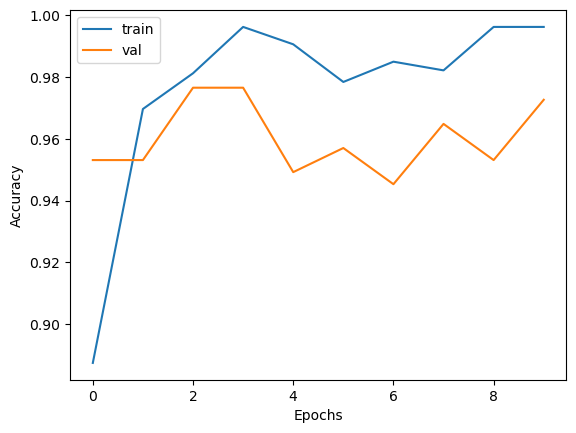

In [73]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

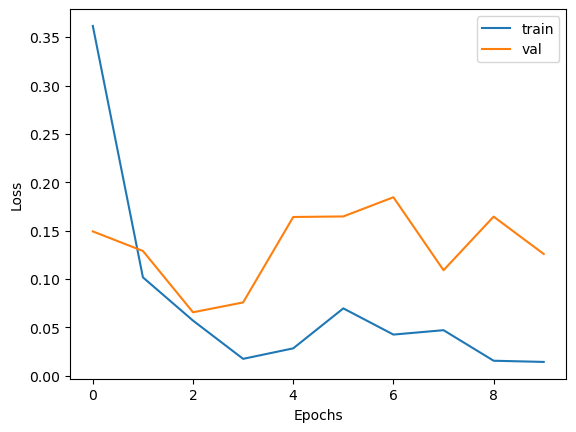

In [74]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [75]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

2023-06-02 00:38:31.803743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


9/9 [==============================] - 23s 2s/step - loss: 0.0658 - accuracy: 0.9743
Test accuracy: 0.9742646813392639
